## Hierarchical Clustering

### 1. 개요

&nbsp;&nbsp; 계층적 군집화는 데이터들 간의 유사도(거리)에 기반해서 가까운 집단끼리 계층적으로 묶어 나가면서 군집을 생성해가는 모델입니다. 각각의 데이터에서 시작해서 계층적으로 군집을 만들어가기 때문에 KMeans 클러스터링 등과는 달리 사전에 군집 개수를 정해줄 필요가 없다는 특징을 갖고 있습니다. 적절한 군집의 수는 완성된 덴드로그램을 통한 계층도를 직접 확인하고 수평선을 그어보는 등의 방식을 통해 결정할 수 있습니다. 

&nbsp;&nbsp; *참고 - Dendrogram : 덴드로그램은 계층적 군집 분석의 결과를 시각적으로 표현하는 트리 형태의 도표로, 군집 수를 선택하거나 군집 간 관계를 분석하는데 유용하게 활용할 수 있습니다.

&nbsp;&nbsp; *참고 - 계층적 군집의 종류

&nbsp;&nbsp;&nbsp;&nbsp; 1)응집형 : 개요에서 설명한 Bottom-up 방식입니다. 간단하고 직관적인 방법으로 훨씬 많이 사용하기에 대부분의 경우 계층적 군집화와 동의어로 봐도 무방합니다.

&nbsp;&nbsp;&nbsp;&nbsp; 2)분리형 : Top-down 방식으로, 하나의 응집에서 시작해 가장 이질적인 부분들로 데이터를 분리해 나가는 방식입니다. 하지만 구현이 어렵기 때문에 제한적으로만 사용합니ㅏㄷ.


### 2. 방법

&nbsp;&nbsp; 위에서 살펴본 대로 유사도(거리)에 기반한 모델이며, 구체적인 진행 방식은 다음과 같이 나뉩니다.

&nbsp;&nbsp; **1)Min(Single Linkage) :** 두 군집에서 가장 가까운 거리를 유사도로 활용하는 방식입니다.

&nbsp;&nbsp; **2)Max(Complete Linkage) :** 두 군집에서 가장 먼 거리를 유사도로 활용하는 방식입니다.

&nbsp;&nbsp; **3)Average Linkage :** 두 군집의 모든 데이터들 간 거리들의 평균을 구해서 유사도로 측정하는 방식입니다.

&nbsp;&nbsp; **4)Centroid Linkage :** 두 군집의 데이터의 중심점의 거리를 활용하는 방식입니다.

&nbsp;&nbsp; **5)Ward Linkage :** 두 군집이 병합되었을 때 증가되는 변동성의 양을 유사도로 활용하는 방식입니다. 즉, 합쳐진 새로 합쳐진 군집 내 분산을 최소화하는 것을 목적으로 기존 군집을 합쳐 나가는 방식입니다. 두 군집 \( C_i \)와 \( C_j \)를 결합할 때의 분산 증가량 \( \Delta S \)는 다음과 같이 계산됩니다:

$$
\Delta S = \frac{n_i n_j}{n_i + n_j} \cdot \| \mathbf{m}_i - \mathbf{m}_j \|^2
$$

&nbsp;&nbsp;&nbsp;&nbsp; - $n_i$와 $n_j$는 각각 군집 $C_i$와 $C_j$의 데이터 포인트 개수입니다.

&nbsp;&nbsp;&nbsp;&nbsp; - $\mathbf{m}_i$와 $\mathbf{m}_j$는 각각 군집 $C_i$와 $C_j$의 중심입니다.

&nbsp;&nbsp;&nbsp;&nbsp; - $\|\mathbf{m}_i - \mathbf{m}_j\|$는 두 군집 중심 간의 거리입니다.


### 4. 장단점

&nbsp;&nbsp; 1)장점

&nbsp;&nbsp;&nbsp;&nbsp; -사용하기 쉬움 : 직관적인 결과를 제공하고, 군집 수를 사전에 지정할 필요가 없습니다.

&nbsp;&nbsp;&nbsp;&nbsp; -다양한 데이터 유형 처리 : 연속형, 범주형 등 다양한 데이터를 처리할 수 있으며, 특히나 비선형 군집 구조를 발견하는 데 유용하게 쓰일 수 있습니다.

&nbsp;&nbsp;&nbsp;&nbsp; -데이터 구조 탐색 : 데이터의 구조와 패턴을 이해 및 분석하고, 군집 간 관계를 탐색하는데 유용합니다.

&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp; 2)단점

&nbsp;&nbsp;&nbsp;&nbsp; -비용 : 데이터 포인트가 많거나 차원이 높을 경우 계산 시간과 메모리 소요가 클 수 있습니다.

&nbsp;&nbsp;&nbsp;&nbsp; -이상치에 취약 : 이상치에 민감하며 군집화 결과가 왜곡되 품질 저하가 일어날 수 있습니다.

&nbsp;&nbsp;&nbsp;&nbsp; -군집 수 결정의 어려움 : 덴드로그램을 통해 군집 수를 선택하는 것이 직관적이나, 쉽다는 의미는 아닙니다.

&nbsp;&nbsp;&nbsp;&nbsp;

### 5. 파이썬 코드

### 6. 참고 자료

&nbsp;&nbsp; https://blog.naver.com/th9231/221985961321

&nbsp;&nbsp; https://blog.naver.com/jaehong7719/221941329165

### 7. 코드 실습

&nbsp;&nbsp; - 출처 : https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering

## Online Retail K-Means & Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
retail = pd.read_csv('C:/Users/neddy/Documents/GitHub/머신러닝학습/OnlineRetail.csv', sep = ",", encoding="ISO-8859-1", header = 0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
retail = retail.dropna()

In [9]:
# Changing the datatype of Customer Id as per Business understanding

retail['CustomerID'] = retail['CustomerID'].astype(str)

필요한 데이터 추가 및 준비 : RFM

In [10]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [11]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [12]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [13]:
# New Attribute : Recency

# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [14]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [15]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [16]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [17]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [18]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

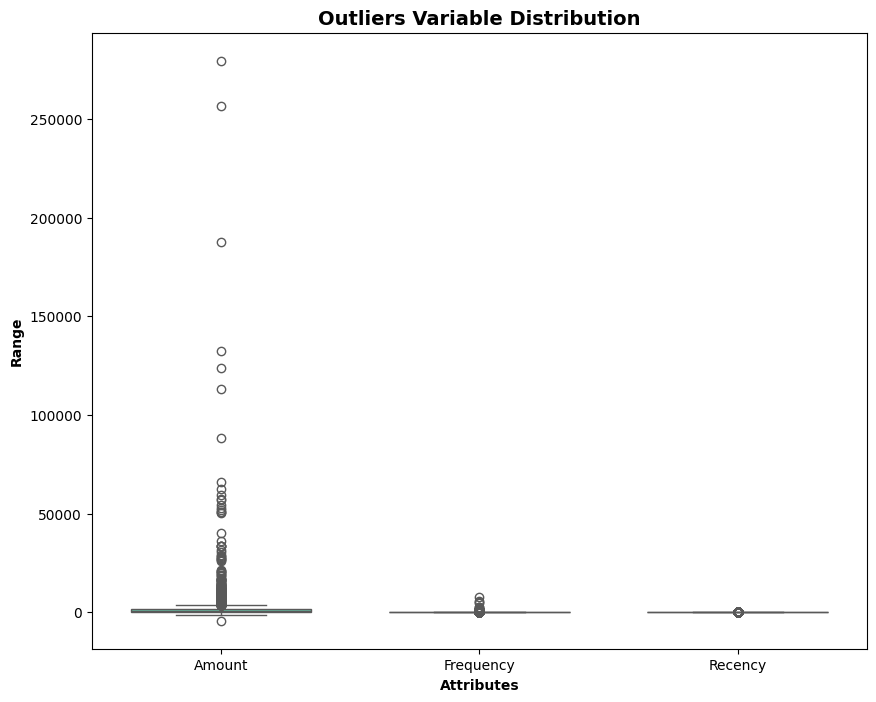

In [19]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [20]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [21]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [22]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


KMeans 클러스터링 먼저 해보기

c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

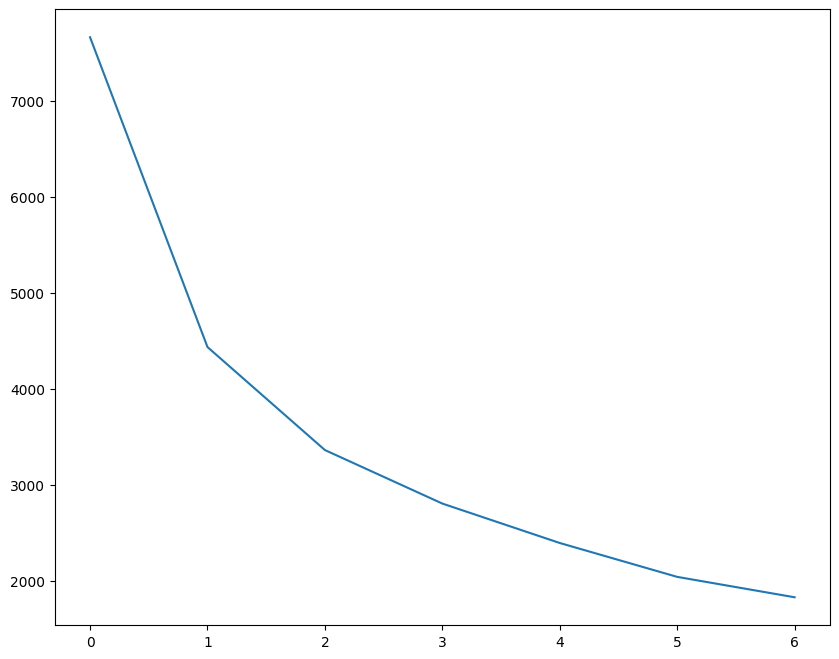

In [23]:
#ssd : sum squared distance
#inertia : 물리학의 관성과 다른 특수용어. 클러스터 내 데이터 포인트들이 얼마나 퍼져있는가 = > SSE(Sum Squared Error)을 의미

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [24]:
ssd

[7661.705869320749,
 4433.580619302123,
 3360.3651951627485,
 2802.8398109108757,
 2391.9702620086277,
 2038.912507105414,
 1826.3719849066563]

In [25]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.4119297987903499


c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.40958630945020674


c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.4096596950024799


c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.40210621012629366


c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.4130303768020937


c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.40254187653147283


c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.4092402227258452


In [26]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=3)

In [27]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [46]:
import plotly.express as px
import plotly.graph_objects as go

# 3D 산점도 그리기
fig = go.Figure()

# 각 클러스터별로 데이터를 추가
for cluster in rfm['Cluster_Id'].unique():
    cluster_data = rfm[rfm['Cluster_Id'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Recency'],
        y=cluster_data['Frequency'],
        z=cluster_data['Amount'],
        mode='markers',
        marker=dict(size=1),  # 점의 크기를 3으로 설정
        name=f'Cluster_Id {cluster}'
    ))

fig.update_layout(
    title='RFM 3D Scatter Plot with Clusters',
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    )
)


fig.show()

계층적 군집

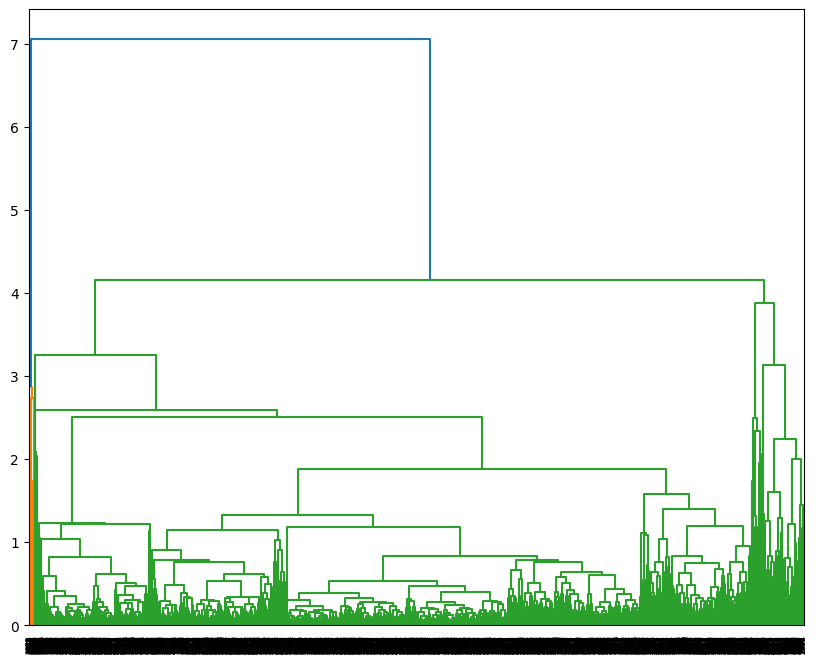

In [47]:
# Average linkage 그리고 유클리드 거리 사용

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

##시간 오래 걸림!!!

In [48]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,0
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


In [50]:
fig = go.Figure()

# 각 클러스터별로 데이터를 추가
for cluster in rfm['Cluster_Labels'].unique():
    cluster_data = rfm[rfm['Cluster_Labels'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Recency'],
        y=cluster_data['Frequency'],
        z=cluster_data['Amount'],
        mode='markers',
        marker=dict(size=1),  # 점의 크기를 3으로 설정
        name=f'Cluster_Labels {cluster}'
    ))

fig.update_layout(
    title='RFM 3D Scatter Plot with Clusters',
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    )
)


fig.show()